In [2]:
import pandas as pd
import numpy as np
import WranglerFunctions as wf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from datetime import datetime
from datetime import timedelta

In [3]:
financial_original = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col = False)
inflation_original = pd.read_csv('../Datasets/Economic_dataset/Inflation.csv', index_col = False)

In [4]:
clean_inflation, _ = wf.Inflation_Unemployment_Wrangler(inflation_original)

In [5]:
clean_financial = wf.F3Metl_Comp_Wrangler(financial_original)

In [6]:
clean_inflation

,Date,Inflation Rate
0,1991-10-31 00:00:00,6.8
1,1991-11-30 00:00:00,7.1
2,1991-12-31 00:00:00,7.2
3,1992-01-31 00:00:00,7.0
4,1992-02-29 00:00:00,6.9
...,...,...
358,2021-08-31 00:00:00,3.2
359,2021-09-30 00:00:00,3.1
360,2021-10-31 00:00:00,4.2
361,2021-11-30 00:00:00,5.1


In [9]:
clean_financial['RIO LN Equity']

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO
Dates,,,,,,,
2000-01-04,1239.156,1243.287,1210.242,1217.677,3585947,1404.1713,25.8338
2000-01-05,1210.242,1218.503,1159.024,1163.981,3342568,1404.1713,24.7820
2000-01-06,1173.068,1218.503,1173.068,1205.286,9503906,1404.1713,25.6770
2000-01-07,1214.373,1226.764,1185.459,1220.982,7508500,1404.1713,25.8881
2000-01-10,1224.286,1226.764,1181.329,1193.720,6438418,1404.1713,25.3255
...,...,...,...,...,...,...,...
2022-01-25,5312.000,5353.000,5276.000,5311.000,2538309,19744.0000,6.1803
2022-01-26,5422.000,5506.000,5388.000,5434.000,2878571,19744.0000,6.3346
2022-01-27,5399.000,5623.000,5384.000,5569.000,2943232,19744.0000,6.4205


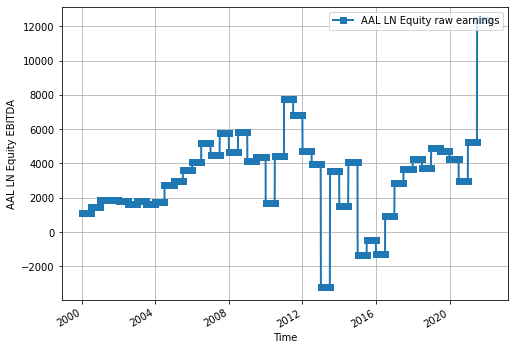

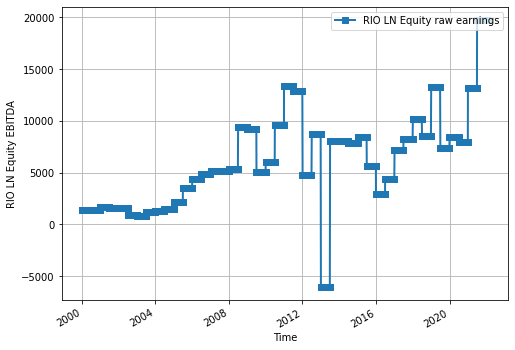

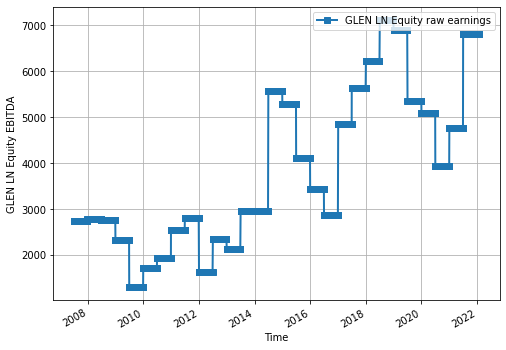

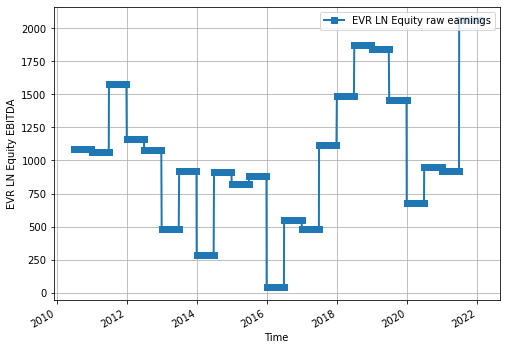

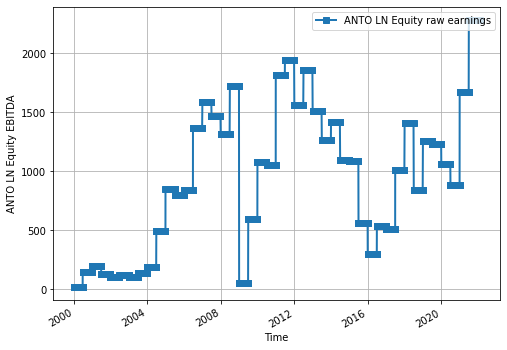

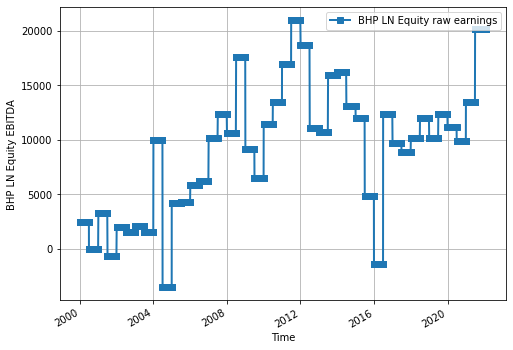

In [10]:
def linePlotCompanyEarnings(df, companyName):
    fig = plt.figure(figsize=(8,6))

    plt.plot(df[companyName].index, df[companyName]['EBITDA'], label=companyName + ' raw earnings', lw=2, marker='s')
    plt.xlabel('Time')
    plt.ylabel(companyName + ' EBITDA')
    plt.grid()
    plt.legend(loc='upper right')

    plt.gcf().autofmt_xdate()

    plt.show()
    
companyNames = set(clean_financial.columns.get_level_values(0).tolist())

for company in companyNames:
    linePlotCompanyEarnings(clean_financial, company)

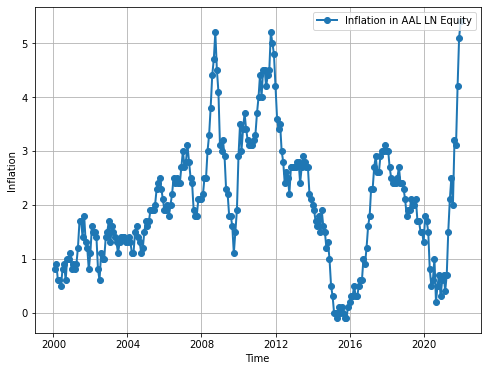

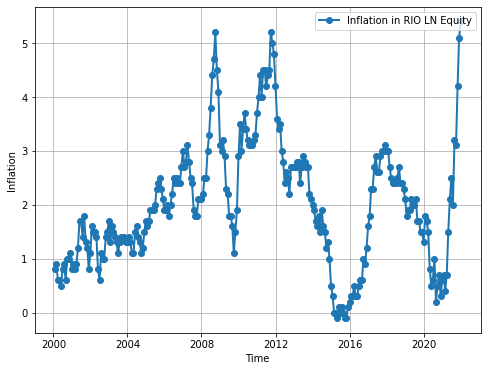

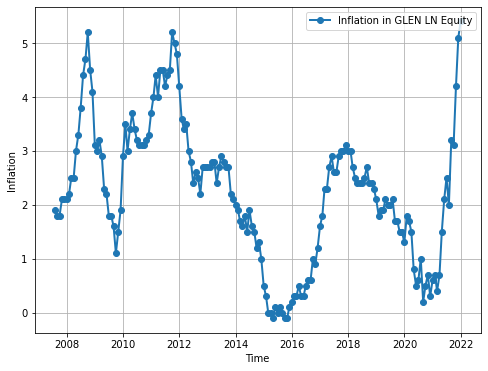

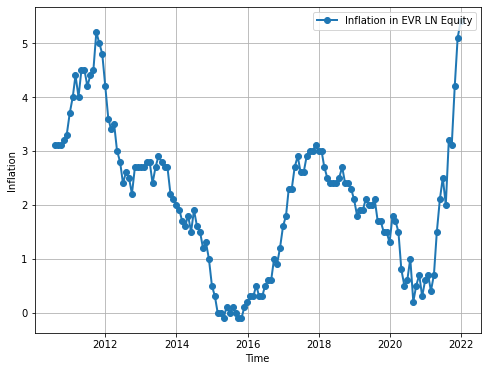

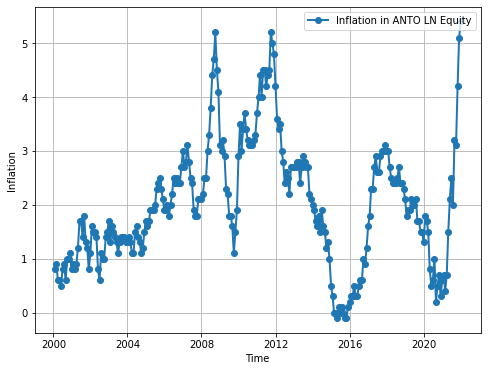

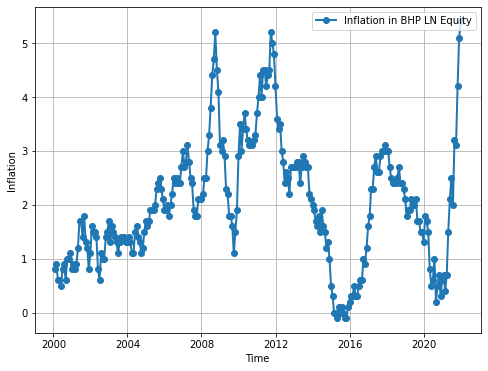

In [11]:
def inflationFromCompanyStart(df_inflation, df_financial, companyName):
    fig = plt.figure(figsize=(8,6))
    df_financial_nonNan = df_financial[companyName]['EBITDA'].dropna()
    
    #print(df_financial_nonNan)
    #print(companyName)
    
    plt.plot(df_inflation[df_inflation['Date'] > df_financial_nonNan.index[0]]['Date'], df_inflation[df_inflation['Date'] > df_financial_nonNan.index[0]]['Inflation Rate'], label='Inflation in ' + companyName, lw=2, marker='o')
    plt.xlabel('Time')
    plt.ylabel('Inflation')
    plt.grid()
    plt.legend(loc='upper right')

    plt.show()

for company in companyNames:
    inflationFromCompanyStart(clean_inflation, clean_financial, company)

In [12]:
# Converting back to normal index since had problems with using datetime as an index
def getEBITDAUnique(df, companyName):
    earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
    earnings_unique = pd.DataFrame(earnings_unique)
    earnings_unique = earnings_unique.dropna()
    earnings_unique = earnings_unique.reset_index()
    return earnings_unique

In [13]:
clean_inflation = clean_inflation.reset_index()
clean_inflation = clean_inflation.drop('index', axis = 1)
clean_inflation

,Date,Inflation Rate
0,1991-10-31 00:00:00,6.8
1,1991-11-30 00:00:00,7.1
2,1991-12-31 00:00:00,7.2
3,1992-01-31 00:00:00,7.0
4,1992-02-29 00:00:00,6.9
...,...,...
358,2021-08-31 00:00:00,3.2
359,2021-09-30 00:00:00,3.1
360,2021-10-31 00:00:00,4.2
361,2021-11-30 00:00:00,5.1


In [11]:
getEBITDAUnique(clean_financial, 'BHP LN Equity')

,Dates,EBITDA
0,2000-01-04,2489
1,2000-06-30,-44
2,2001-01-01,3279
3,2001-07-02,-654
4,2001-12-31,1965
5,2002-07-01,1549
6,2002-12-31,2069
7,2003-06-30,1540
8,2003-12-31,9947
9,2004-06-30,-3530


In [14]:
# O(log n)

def closest_date(dateList, date, start, end):
    if start > end:
        return (start + end) // 2

    mid = (start + end) // 2
    if date == dateList[mid]:
        return mid

    if date < dateList[mid]:
        return closest_date(dateList, date, start, mid-1)
    else:
        return closest_date(dateList, date, mid+1, end)

def add_inflation(df, inflation):
    df['Inflation Rate'] = np.nan
    i = 0
    for i in range(len(df)):
        date = df['Dates'][i]
        closestInflationDate = closest_date(inflation['Date'], date, 0, len(inflation['Date']))
        df.loc[i, 'Inflation Rate'] = inflation['Inflation Rate'][closestInflationDate]
    return df
        
for company in companyNames:
    earnings_unique = getEBITDAUnique(clean_financial, company)
    add_inflation(earnings_unique, clean_inflation)
    
    print(company)
    print(earnings_unique.cov().to_markdown())

AAL LN Equity


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

## Covariance between UK inflation and EBITDA in different companies

AAL LN Equity

|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    6.68778e+06 |       1527.46    |
| Inflation Rate | 1527.46        |          1.12577 |

GLEN LN Equity

|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    3.10558e+06 |       -620.797   |
| Inflation Rate | -620.797       |          1.41016 |

BHP LN Equity

|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    3.59535e+07 |       3918.13    |
| Inflation Rate | 3918.13        |          1.12577 |

ANTO LN Equity

|                |     EBITDA |   Inflation Rate |
|:---------------|-----------:|-----------------:|
| EBITDA         | 375750     |        398.053   |
| Inflation Rate |    398.053 |          1.12577 |

RIO LN Equity

|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    2.18944e+07 |       1856.86    |
| Inflation Rate | 1856.86        |          1.17571 |

EVR LN Equity

|                |     EBITDA |   Inflation Rate |
|:---------------|-----------:|-----------------:|
| EBITDA         | 260682     |        292.955   |
| Inflation Rate |    292.955 |          1.52352 |

In [1]:
for company in companyNames:
    earnings_unique = getEBITDAUnique(clean_financial, company)
    add_inflation(earnings_unique, clean_inflation)
    
    print(company)
    print(earnings_unique.corr().to_markdown())

NameError: name 'companyNames' is not defined

## Pearson's coefficient between UK inflation and earnings of companies

AAL LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.556678 |
| Inflation Rate | 0.556678 |         1        |

GLEN LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         |  1       |         -0.29665 |
| Inflation Rate | -0.29665 |          1       |

BHP LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.615863 |
| Inflation Rate | 0.615863 |         1        |

ANTO LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.612023 |
| Inflation Rate | 0.612023 |         1        |

RIO LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.365984 |
| Inflation Rate | 0.365984 |         1        |

EVR LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.464858 |
| Inflation Rate | 0.464858 |         1        |

In [14]:
def scatterPlotInflationVsEBITDA(df, companyName):
    fig = plt.figure(figsize=(8,6))

    plt.scatter(earnings_unique['Inflation Rate'], earnings_unique['EBITDA'])
    plt.xlabel('UK Inflation')
    plt.ylabel('EBITDA in ' + companyName)
    plt.grid()
    plt.show()

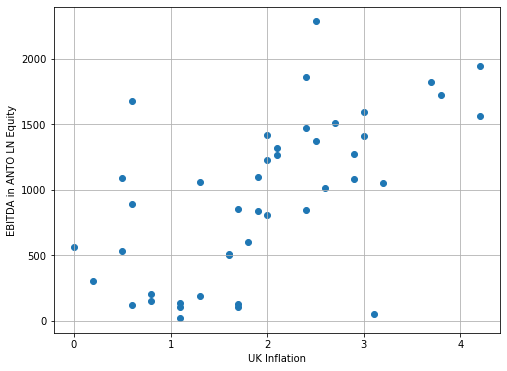

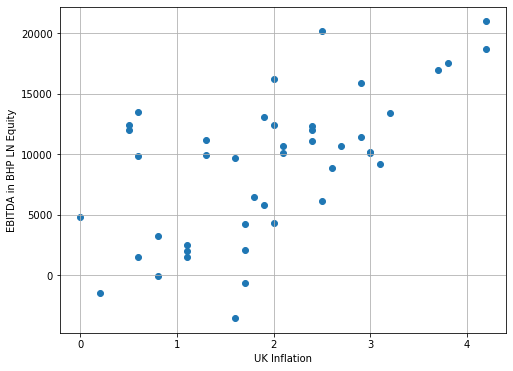

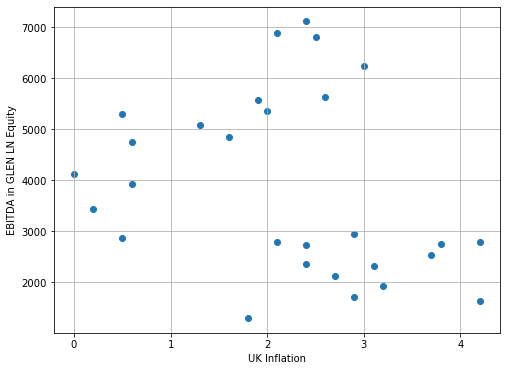

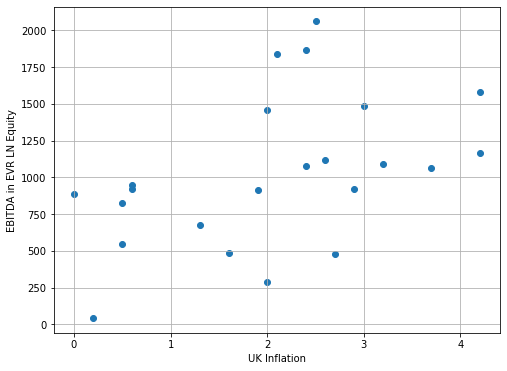

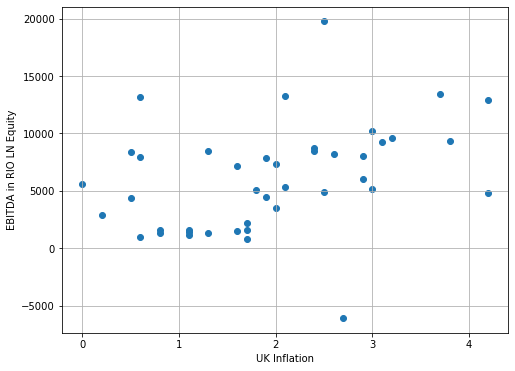

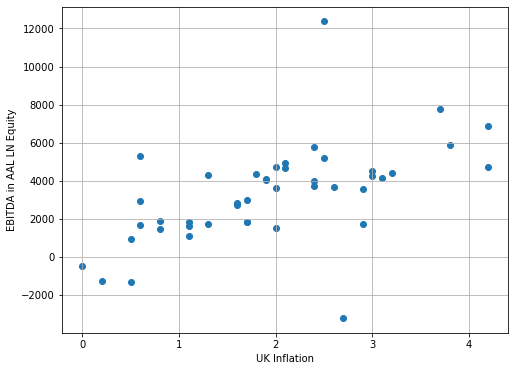

In [15]:
for company in companyNames:
    earnings_unique = getEBITDAUnique(clean_financial, company)
    add_inflation(earnings_unique, clean_inflation)
    
    scatterPlotInflationVsEBITDA(earnings_unique, company)

## Exploring relationship between earnings of competitors and company earnings

In [16]:
earningsList = []
for company in companyNames:
    earningsList.append(clean_financial[company]['EBITDA'])
earnings = pd.DataFrame(np.array(earningsList).T, columns = companyNames)
earnings.index = clean_financial.index
earnings

,ANTO LN Equity,BHP LN Equity,GLEN LN Equity,EVR LN Equity,RIO LN Equity,AAL LN Equity
Dates,,,,,,
2000-01-04,20.1981,2489.0,NaN,NaN,1404.1713,1118.0
2000-01-05,20.1981,2489.0,NaN,NaN,1404.1713,1118.0
2000-01-06,20.1981,2489.0,NaN,NaN,1404.1713,1118.0
2000-01-07,20.1981,2489.0,NaN,NaN,1404.1713,1118.0
2000-01-10,20.1981,2489.0,NaN,NaN,1404.1713,1118.0
...,...,...,...,...,...,...
2022-01-25,2283.1000,20181.0,6806.0,2061.0,19744.0000,12367.0
2022-01-26,2283.1000,20181.0,6806.0,2061.0,19744.0000,12367.0
2022-01-27,2283.1000,20181.0,6806.0,2061.0,19744.0000,12367.0


In [17]:
earnings.cov()

,ANTO LN Equity,BHP LN Equity,GLEN LN Equity,EVR LN Equity,RIO LN Equity,AAL LN Equity
ANTO LN Equity,3.726161e+05,2.929310e+06,5.976215e+04,1.317217e+05,1.825055e+06,9.781110e+05
BHP LN Equity,2.929310e+06,3.557232e+07,-2.227498e+05,1.127920e+06,1.916980e+07,8.696303e+06
GLEN LN Equity,5.976215e+04,-2.227498e+05,2.954192e+06,4.492687e+05,3.500013e+06,1.115259e+06
EVR LN Equity,1.317217e+05,1.127920e+06,4.492687e+05,2.551072e+05,1.582544e+06,1.196673e+06
RIO LN Equity,1.825055e+06,1.916980e+07,3.500013e+06,1.582544e+06,2.116724e+07,9.138545e+06
AAL LN Equity,9.781110e+05,8.696303e+06,1.115259e+06,1.196673e+06,9.138545e+06,6.839442e+06


In [18]:
earnings.corr()

,ANTO LN Equity,BHP LN Equity,GLEN LN Equity,EVR LN Equity,RIO LN Equity,AAL LN Equity
ANTO LN Equity,1.000000,0.804597,0.067227,0.524181,0.649850,0.612699
BHP LN Equity,0.804597,1.000000,-0.028510,0.467758,0.698601,0.557530
GLEN LN Equity,0.067227,-0.028510,1.000000,0.528885,0.463559,0.215109
EVR LN Equity,0.524181,0.467758,0.528885,1.000000,0.656872,0.720524
RIO LN Equity,0.649850,0.698601,0.463559,0.656872,1.000000,0.759512
AAL LN Equity,0.612699,0.557530,0.215109,0.720524,0.759512,1.000000


We can see below that some companies have EBITDA very correlated to other companies earnings. For example AAL LN Equity and RIO LN Equity have a correlation of 0.86. - Maybe a reason for interconnectedness between these two companies which we may look into.

I expected AAL and BHP to be higher since they are both Australian companies.

In [19]:
earnings.dropna().corr()

,ANTO LN Equity,BHP LN Equity,GLEN LN Equity,EVR LN Equity,RIO LN Equity,AAL LN Equity
ANTO LN Equity,1.000000,0.759252,-0.057013,0.524181,0.516515,0.660362
BHP LN Equity,0.759252,1.000000,-0.130679,0.467758,0.488133,0.656598
GLEN LN Equity,-0.057013,-0.130679,1.000000,0.528885,0.448808,0.293249
EVR LN Equity,0.524181,0.467758,0.528885,1.000000,0.656872,0.720524
RIO LN Equity,0.516515,0.488133,0.448808,0.656872,1.000000,0.861145
AAL LN Equity,0.660362,0.656598,0.293249,0.720524,0.861145,1.000000


## UK Unemployment

In [20]:
unemployment_original = pd.read_csv('../Datasets/Economic_dataset/Unemployment.csv', index_col = False)
clean_unemployment, _ = wf.Inflation_Unemployment_Wrangler(unemployment_original)

In [21]:
clean_unemployment

,Date,Unemployment Rate
0,1971-06-30 00:00:00,4.00
1,1971-09-30 00:00:00,4.17
2,1971-12-31 00:00:00,4.37
3,1972-03-31 00:00:00,4.50
4,1972-06-30 00:00:00,4.47
...,...,...
197,2020-09-30 00:00:00,4.53
198,2020-12-31 00:00:00,5.10
199,2021-03-31 00:00:00,5.00
200,2021-06-30 00:00:00,4.77


In [22]:
def add_Unemployment(df, unemployment):
    df['Unemployment'] = np.nan
    i = 0
    for i in range(len(df)):
        date = df['Dates'][i]
        closestDate = closest_date(unemployment['Date'], date, 0, len(unemployment['Date']))
        df.loc[i, 'Unemployment'] = unemployment['Unemployment Rate'][closestDate]
    return df

In [23]:
for company in companyNames:
    earnings_unique = getEBITDAUnique(clean_financial, company)
    add_Unemployment(earnings_unique, clean_unemployment)
    
    print(company)
    #print(earnings_unique.corr().to_markdown())
    print(earnings_unique)

ANTO LN Equity
        Dates     EBITDA  Unemployment
0  2000-01-04    20.1981          5.80
1  2000-06-30   146.8564          5.60
2  2001-01-01   202.4819          5.30
3  2001-07-02   129.8924          4.97
4  2001-12-31   105.5000          5.13
5  2002-07-01   122.4650          5.20
6  2002-12-31   105.4480          5.17
7  2003-06-30   136.2500          5.00
8  2003-12-31   186.5260          4.93
9  2004-06-30   498.4000          4.80
10 2004-12-31   855.0000          4.70
11 2005-06-30   802.6000          4.77
12 2006-01-02   838.8000          5.03
13 2006-06-30  1370.7000          5.40
14 2007-01-01  1590.0000          5.47
15 2007-07-02  1469.5000          5.43
16 2007-12-31  1314.7000          5.20
17 2008-06-30  1722.5000          5.30
18 2008-12-31    53.9000          6.20
19 2009-06-30   598.1000          7.57
20 2009-12-31  1078.4000          7.83
21 2010-06-30  1051.7000          7.93
22 2010-12-31  1819.8000          7.90
23 2011-06-30  1944.8000          7.80
24 2012-01

### Unemployment correlation with company earnings

Below shows that there is not much correlation between UK unemployment and company earnings. This indicates that most employment in the company may potentially be overseas?

BHP LN Equity

|              |   EBITDA |   Unemployment |
|:-------------|---------:|---------------:|
| EBITDA       | 1        |       0.384277 |
| Unemployment | 0.384277 |       1        |

EVR LN Equity

|              |    EBITDA |   Unemployment |
|:-------------|----------:|---------------:|
| EBITDA       |  1        |      -0.198389 |
| Unemployment | -0.198389 |       1        |

GLEN LN Equity

|              |    EBITDA |   Unemployment |
|:-------------|----------:|---------------:|
| EBITDA       |  1        |      -0.754216 |
| Unemployment | -0.754216 |       1        |

ANTO LN Equity

|              |   EBITDA |   Unemployment |
|:-------------|---------:|---------------:|
| EBITDA       | 1        |       0.312585 |
| Unemployment | 0.312585 |       1        |

AAL LN Equity

|              |     EBITDA |   Unemployment |
|:-------------|-----------:|---------------:|
| EBITDA       |  1         |     -0.0155871 |
| Unemployment | -0.0155871 |      1         |

RIO LN Equity

|              |     EBITDA |   Unemployment |
|:-------------|-----------:|---------------:|
| EBITDA       | 1          |     0.00994512 |
| Unemployment | 0.00994512 |     1          |

## PCA basis

Plan is to have many features and then perform the code below to get principal component analysis and the top features which explain the dataset. Then we can check if the output correlates well with company earnings?

We currently only have 2 features, so should get more data

In [24]:
companyEarnings = pd.DataFrame()
for company in companyNames:
    earnings_unique = getEBITDAUnique(clean_financial, company)
    add_Unemployment(earnings_unique, clean_unemployment)
    add_inflation(earnings_unique, clean_inflation)
    
    print(company)
    #print(earnings_unique.corr().to_markdown())
#     print(earnings_unique)
    companyEarnings = pd.concat([companyEarnings, earnings_unique], axis = 0)
companyEarnings

ANTO LN Equity
BHP LN Equity
GLEN LN Equity
EVR LN Equity
RIO LN Equity
AAL LN Equity


,Dates,EBITDA,Unemployment,Inflation Rate
0,2000-01-04,20.1981,5.80,1.1
1,2000-06-30,146.8564,5.60,0.8
2,2001-01-01,202.4819,5.30,0.8
3,2001-07-02,129.8924,4.97,1.7
4,2001-12-31,105.5000,5.13,1.1
...,...,...,...,...
39,2019-07-01,4700.0000,3.83,2.0
40,2019-12-31,4288.0000,3.80,1.3
41,2020-06-30,2949.0000,4.07,0.6
42,2020-12-31,5279.0000,5.10,0.6


In [25]:
companyEarnings = companyEarnings.drop(labels = 'Dates', axis = 1)
companyEarnings = companyEarnings.reset_index(drop = True)

I am trying to concatenate all data in one dataframe, so we can perform principal component analysis to find which features explain the variance the most.

In [26]:
companyEarnings

,EBITDA,Unemployment,Inflation Rate
0,20.1981,5.80,1.1
1,146.8564,5.60,0.8
2,202.4819,5.30,0.8
3,129.8924,4.97,1.7
4,105.5000,5.13,1.1
...,...,...,...
220,4700.0000,3.83,2.0
221,4288.0000,3.80,1.3
222,2949.0000,4.07,0.6
223,5279.0000,5.10,0.6


In [27]:
features = ['Unemployment', 'Inflation Rate']

x = companyEarnings.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [28]:
x.shape

(225, 2)

In [29]:
np.mean(x),np.std(x) # Mean should be 0 and standard deviation 1 - as data is being standardised

(-2.0921536108491838e-16, 1.0)

In [30]:
# Converting normalised data into tabular format
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_companyEarnings = pd.DataFrame(x, columns=feat_cols)

In [31]:
normalised_companyEarnings

,feature0,feature1
0,0.074448,-0.820177
1,-0.070580,-1.095884
2,-0.288122,-1.095884
3,-0.527417,-0.268763
4,-0.411395,-0.820177
...,...,...
220,-1.354075,0.006944
221,-1.375830,-0.636372
222,-1.180042,-1.279689
223,-0.433149,-1.279689


In [32]:
pca_companyEarnings = PCA(n_components = 2)
principalComponents_earnings = pca_companyEarnings.fit_transform(x)

In [33]:
principal_Df = pd.DataFrame(data = principalComponents_earnings, columns = ['principal component 1', 'principal component 2'])
principal_Df

,principal component 1,principal component 2
0,-0.527310,-0.632595
1,-0.824815,-0.724999
2,-0.978640,-0.571174
3,-0.562985,0.182896
4,-0.870853,-0.289052
...,...,...
220,-0.952566,0.962386
221,-1.422842,0.522875
222,-1.739292,-0.070461
223,-1.211159,-0.598594


In [34]:
print('Explained variation per principal component: {}'.format(pca_companyEarnings.explained_variance_ratio_))

Explained variation per principal component: [0.75156949 0.24843051]


I don't know how to make sizes scalable or change the legend values to match actual EBITDA values.

I currently set s = companyEarnings[EBITDA] / 100.

Red points represent when EBITDA is negative, i.e. when companies lose money

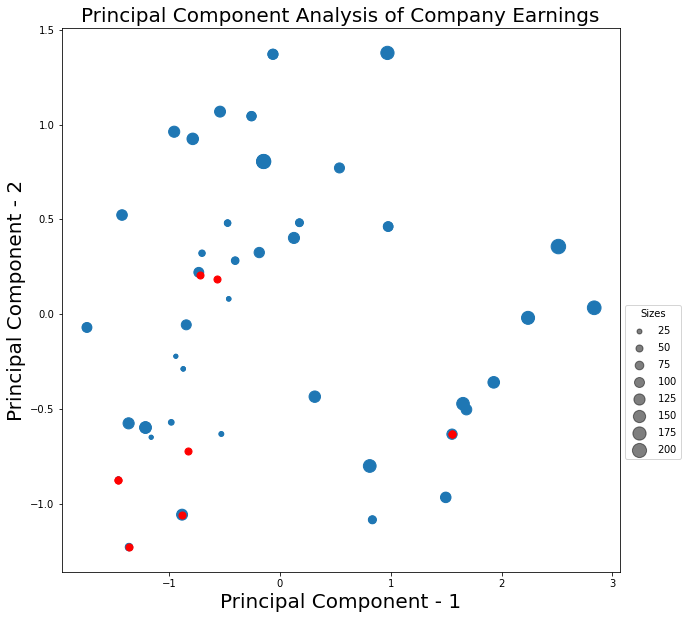

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlabel('Principal Component - 1',fontsize=20)
ax.set_ylabel('Principal Component - 2',fontsize=20)
ax.set_title("Principal Component Analysis of Company Earnings",fontsize=20)

positiveEarnings = companyEarnings[companyEarnings['EBITDA'] > 0].index
negativeEarnings = companyEarnings[companyEarnings['EBITDA'] <= 0].index

scatter = ax.scatter(principal_Df['principal component 1'][positiveEarnings], 
            principal_Df['principal component 2'][positiveEarnings], s = companyEarnings['EBITDA'][positiveEarnings] / 100)

scatter1 = ax.scatter(principal_Df['principal component 1'][negativeEarnings], 
            principal_Df['principal component 2'][negativeEarnings], s = 50, c = 'r')


handles, labels = scatter.legend_elements(prop="sizes", alpha = 0.5)
# Put a legend to the right of the current axis
legend = ax.legend(handles, labels, loc="best", title="Sizes", bbox_to_anchor=(1, 0.5))

plt.show()